In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import iqr

%matplotlib inline

In [2]:
df = pd.read_csv('conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [3]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [4]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
df.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [6]:
df.ad_id.unique()

array([ 708746,  708749,  708771, ..., 1314412, 1314414, 1314415])

In [7]:
df.ad_id.nunique()

1143

In [8]:
df.xyz_campaign_id.nunique()

3

In [16]:
grouped = df.groupby('fb_campaign_id', as_index=False).agg({'Impressions' : 'sum'})
grouped['Impressions_log'] = np.log(grouped.Impressions)
grouped

,fb_campaign_id,Impressions,Impressions_log
0,103916,7350,8.902456
1,103917,17861,9.790375
2,103920,693,6.541030
3,103928,8392,9.035034
4,103929,1915,7.557473
...,...,...,...
686,179977,1129773,13.937527
687,179978,637549,13.365386
688,179979,151531,11.928546
689,179981,790253,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


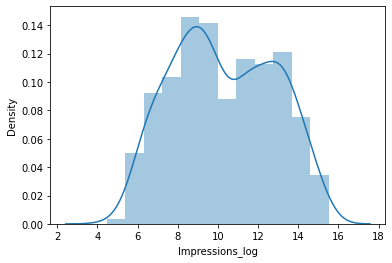

In [17]:
ax = sns.distplot(grouped['Impressions_log'])

## CTR:

In [18]:
df['ctr'] = df.Clicks / df.Impressions
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


In [36]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [21]:
df = df.sort_values('ctr', ascending=False)
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [31]:
d916 = df[df.xyz_campaign_id == 916]
d916

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
14,709059,916,103968,30-34,M,20,14669,7,10.28,1,1,0.000477
34,710360,916,104185,45-49,M,21,2182,1,1.53,1,1,0.000458
33,710088,916,104140,45-49,M,24,2283,1,1.47,1,0,0.000438
16,709115,916,103978,30-34,M,30,2305,1,0.57,1,0,0.000434
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
46,710961,916,104285,35-39,F,25,2508,1,1.22,1,0,0.000399
52,711877,916,104438,45-49,F,63,17572,7,9.38,1,0,0.000398
45,710880,916,104272,30-34,F,65,13019,5,6.96,1,0,0.000384
48,711217,916,104328,35-39,F,20,2783,1,1.60,1,0,0.000359
50,711764,916,104419,45-49,F,10,11199,4,5.73,1,1,0.000357


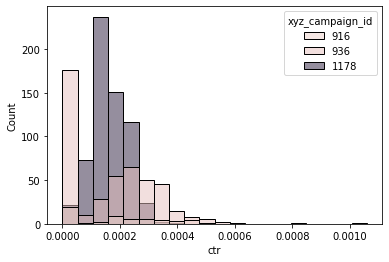

In [30]:
ax = sns.histplot(data=df, x='ctr', bins=20, hue = 'xyz_campaign_id')

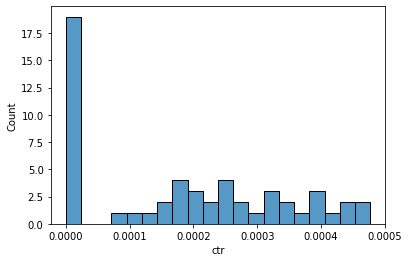

In [32]:
ax = sns.histplot(data=d916, x='ctr', bins=20)

## CPC:

In [33]:
df['cpc'] = df.Spent / df.Clicks 
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059,1.42
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845,1.42
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610,1.34
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565,1.43
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000,NaN
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000,NaN
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000,NaN
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000,NaN


In [35]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


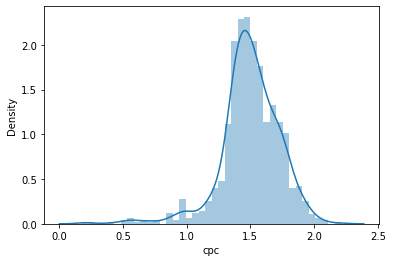

In [37]:
ax = sns.distplot(df.cpc.dropna())

In [41]:
iqr(df.cpc, nan_policy='omit')

0.25436369905

In [45]:
dff = df.dropna()
dff

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059,1.42
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845,1.42
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610,1.34
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565,1.43
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,1121133,1178,144538,30-34,M,22,25002,1,1.71,1,0,0.000040,1.71
1056,1314308,1178,179875,30-34,M,112,51104,2,3.20,3,1,0.000039,1.60
526,1121101,1178,144532,30-34,M,15,29945,1,1.59,2,1,0.000033,1.59
523,1121097,1178,144532,30-34,M,15,30068,1,1.82,1,0,0.000033,1.82


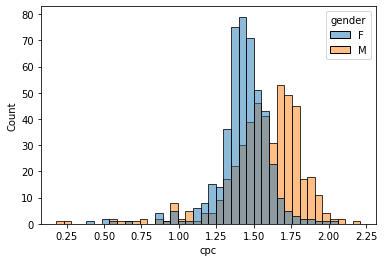

In [46]:
ax = sns.histplot(data=dff, x='cpc', hue='gender')

## Conversion rate:

In [47]:
df['cr'] = df.Approved_Conversion / df.Clicks 
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059,1.42,0.000000
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845,1.42,0.500000
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610,1.34,0.000000
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565,1.43,0.333333
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531,1.41,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000,NaN,inf
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000,NaN,NaN
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000,NaN,NaN
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000,NaN,inf


In [49]:
df[df.ad_id == 1121814].cr*100

860    3.087886
Name: cr, dtype: float64